In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv('all_the_data_rmOutliers.csv')

In [4]:
df.mouse_details_strain.unique()

array(['BW', 'BWPOF2', 'PO', 'BWPOF1'], dtype=object)

In [5]:
df = df[df.mouse_details_sex.isin(['M', 'F'])]
df = df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1', 'BWPOF2'])]
df['Sex'] = df['mouse_details_sex'].apply(lambda x: 'Male' if x == 'M' else 'Female')

In [7]:
var = 'mouse_dimensions_mouseLength'
df_2 = df[['mouse_details_strain', 'mouse_details_sex', 'Sex', var]]
df_2.head(10)

,mouse_details_strain,mouse_details_sex,Sex,mouse_dimensions_mouseLength
0,BW,M,Male,7.260598
1,BW,M,Male,7.118170
2,BWPOF2,F,Female,7.168398
3,BWPOF2,F,Female,7.118569
4,PO,F,Female,6.785503
5,PO,F,Female,6.252075
6,PO,F,Female,6.363449
7,BWPOF2,M,Male,6.713208
8,BWPOF2,M,Male,6.911091
9,BWPOF2,M,Male,6.294963


In [6]:
def detect_outlier(data_1):
    outliers = []
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [ ]:
detect_outlier(df[var])

In [ ]:
var = 'mouse_dimensions_mouseLength'
sns.set(style="ticks")
sns.set_style("whitegrid")

df2 = df[df[var] > 3]

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df2,
            whis="range", palette="vlag", order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'] )

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df2[df2.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df2[df2.mouse_details_strain.isin(['BWPOF2'])],
              size=1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Tweak the visual presentation
ax.set_title("Mouse Length")
ax.xaxis.grid(True)
ax.legend(loc=2)
ax.set(ylabel="Species", xlabel = "Length (cm)")
#ax.ylim(min(df[var], max(df[var])))
sns.despine()
f.savefig("PosterPlots/"+ var + ".pdf")

In [ ]:
var = "turning_preferences_fraction_straight"
sns.set(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
               order = ['BW', 'PO','BWPOF1', 'BWPOF2'],
               whis="range", palette="vlag")#, inner = None)

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
              size=1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

ax.set_title("Turn Preference Straight")
ax.xaxis.grid(True)
ax.legend(loc=1)
ax.set(ylabel="Species", xlabel = "Fraction of Time")
sns.despine(left = True)
f.savefig("PosterPlots/"+ var + ".pdf")

In [ ]:
var = "turning_preferences_fraction_left"

sns.set(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
               order = ['BW', 'PO','BWPOF1', 'BWPOF2'],
               whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
              size=1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

ax.set_title("Turn Preference Left")
ax.xaxis.grid(True)
ax.legend(loc=1)
ax.set(ylabel="Species", xlabel = "Fraction of Time")
sns.despine(left = True)
f.savefig("PosterPlots/"+ var + ".pdf")

In [ ]:
var = "safety_fraction_closed_arms"

sns.set(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
               order = ['BW', 'PO','BWPOF1', 'BWPOF2'],
               whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
              size=1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

ax.set_title("Fration of Time Spent in Safety")
ax.xaxis.grid(True)
ax.legend(loc=1)
ax.set(ylabel="Species", xlabel = "Fraction of Time")
sns.despine(left = True)
f.savefig("PosterPlots/"+ var + ".pdf")

In [ ]:
var = "fraction_in_arms_closed"

sns.set(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
               order = ['BW', 'PO','BWPOF1', 'BWPOF2'],
               whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
              size=1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

ax.set_title("Fration in Closed Arms")
ax.xaxis.grid(True)
ax.legend(loc=2)
ax.set(ylabel="Species", xlabel = "Fraction of Time")
sns.despine(left = True)
f.savefig("PosterPlots/"+ var + ".pdf")

In [ ]:
var = "velocity_closed_towards_outside_average_speed_active"

sns.set(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
               order = ['BW', 'PO','BWPOF1', 'BWPOF2'],
               whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
              size=1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

ax.set_title(var)
ax.xaxis.grid(True)
ax.legend(loc=1)
ax.set(ylabel="Species", xlabel = "Velocity")
sns.despine()
f.savefig("PosterPlots/"+ var + ".pdf")

df[df.mouse_dimensions_mouseLength == min(df.mouse_dimensions_mouseLength)] df = df.drop([402])

df[df.backtrack_counts_CL == max(df.backtrack_counts_CL)]
df = df.drop([725])

df[df.velocity_OB_total_average_speed == max(df.velocity_OB_total_average_speed)]
df = df.drop([27])

df[df.peeking_average_length_CL == max(df.peeking_average_length_CL)]
df = df.drop([857])

df[df.velocity_OB_total_median_speed_active == max(df.velocity_OB_total_median_speed_active)]
df = df.drop([1617])

df[df.velocity_OT_down_median_speed_active > max(df.velocity_OT_total_median_speed_active-4)]
df = df.drop([7])

df.to_csv('all_the_data_rmOutliers.csv', index = False)

max(df.velocity_OT_total_median_speed_active)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import SeabornFig2Grid as sfg


from sklearn import preprocessing

In [ ]:
columns = pd.DataFrame(df.columns)

col_to_ignore = ['inner_directory',
                'mouse_details_EPM',
                'mouse_details_date',
                'mouse_details_mouseID',
                'mouse_details_sex',
                'mouse_details_strain',
                'mouse_details_time', 'Unnamed: 0']

columns = columns[columns.isin(col_to_ignore) == False].dropna()[0]
fig, ax = plt.subplots(5,4, figsize=(14,12))
ax = ax.flatten()
for axes, var in zip(ax, columns[15:35]):
    print(var)
    # Plot the orbital period with horizontal boxes
    sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data = df,
               order = ['BW', 'PO'], whis="range", palette="vlag", ax = axes)

    # Add in points to show each observation
    sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', data = df,
                  size=3, color=".3", dodge = True, linewidth=0, 
                  order = ['BW', 'PO'], ax = axes)
    
    axes.xaxis.grid(True)
    axes.legend_.remove()
    axes.set(ylabel="Species")
    sns.despine()
    
plt.tight_layout()  
plt.show()
fig.savefig("PosterPlots/"+ 'Test' + ".pdf")

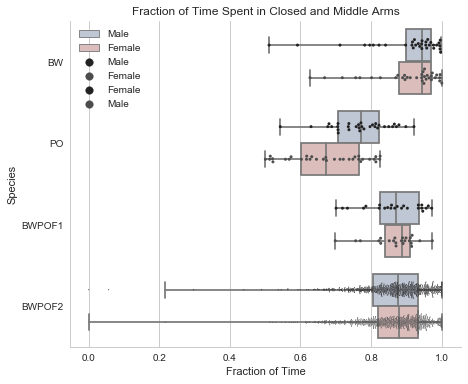

In [21]:
var = 'fraction_in_arms_closed_and_middle'
sns.set(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
               order = ['BW', 'PO','BWPOF1', 'BWPOF2'],
               whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
              size=1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

ax.set_title('Fraction of Time Spent in Closed and Middle Arms')
ax.xaxis.grid(True)
ax.legend(loc=2)
ax.set(ylabel="Species", xlabel = "Fraction of Time")
sns.despine()
f.savefig("PosterPlots/"+ var + ".pdf")

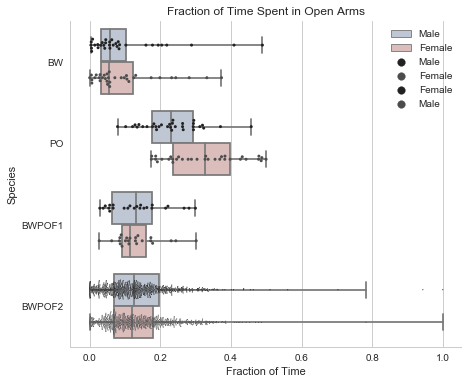

In [25]:
var = 'fraction_in_arms_open'
sns.set(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x=var, y="mouse_details_strain", hue = 'Sex', data=df,
               order = ['BW', 'PO','BWPOF1', 'BWPOF2'],
               whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BW', 'PO', 'BWPOF1'])],
              size=3, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

# Add in points to show each observation
sns.swarmplot(x=var, y="mouse_details_strain", hue = 'Sex', 
              data=df[df.mouse_details_strain.isin(['BWPOF2'])],
              size=1.1, color=".3", dodge = True, linewidth=0, 
              order = ['BW', 'PO', 'BWPOF1', 'BWPOF2'])

ax.set_title('Fraction of Time Spent in Open Arms')
ax.xaxis.grid(True)
ax.legend(loc=1)
ax.set(ylabel="Species", xlabel = "Fraction of Time")
sns.despine()
f.savefig("PosterPlots/"+ var + ".pdf")

In [36]:
df['count'] = 1 
gen_sp_count = df[["mouse_details_strain", 'Sex', 'count']].groupby(["mouse_details_strain", 'Sex'], as_index=False).agg('count')
#gen_sp_count["mouse_details_strain"] = gen_sp_count.index
gen_sp_count

,mouse_details_strain,Sex,count
0,BW,Female,34
1,BW,Male,33
2,BWPOF1,Female,24
3,BWPOF1,Male,24
4,BWPOF2,Female,770
5,BWPOF2,Male,808
6,PO,Female,34
7,PO,Male,34


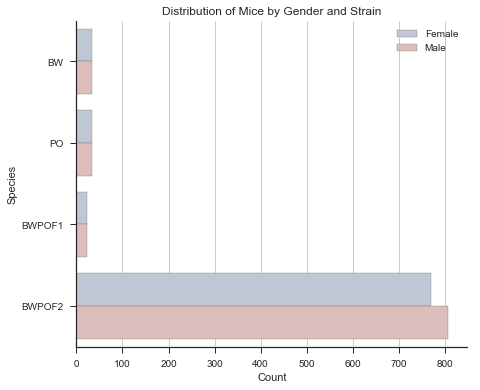

In [51]:
sns.set(style="ticks")
#sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.barplot(x='count', y="mouse_details_strain", hue = 'Sex', data=gen_sp_count,
               order = ['BW', 'PO','BWPOF1', 'BWPOF2'], palette="vlag",errcolor=".4", edgecolor=".4")

ax.set_title('Distribution of Mice by Gender and Strain')
ax.xaxis.grid(True)
ax.legend(loc=1)
ax.set(ylabel="Species", xlabel = "Count")
sns.despine()
f.savefig("PosterPlots/"+ "Gen_Strain_Count" + ".pdf")